# Imports

In [2]:
import tkinter as tk
from tkinter import *
from tkinter.ttk import *
from tkinter import ttk
import PIL as pil
from PIL import ImageTk, Image

import pandas as pd
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


## Import data

In [3]:
data_path = r'Data\train.csv'
temp_data = pd.read_csv(data_path, index_col=['Id'])

train_data = pd.DataFrame(temp_data)

X = train_data.drop(columns=['Pawpularity'])
y = train_data['Pawpularity']
random = 30997
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=random)

# Uge 10 kapitel 7

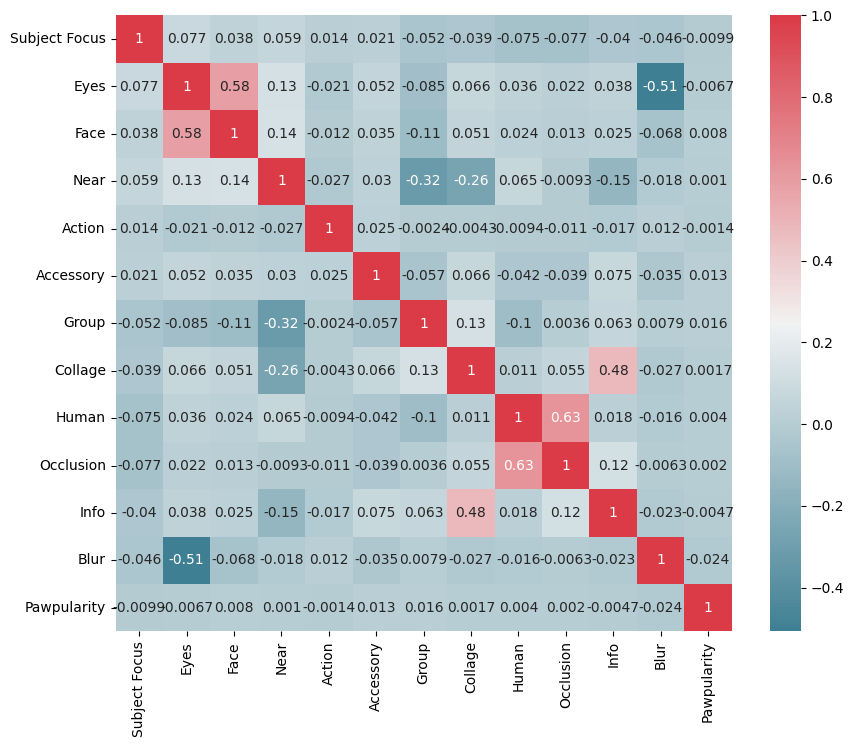

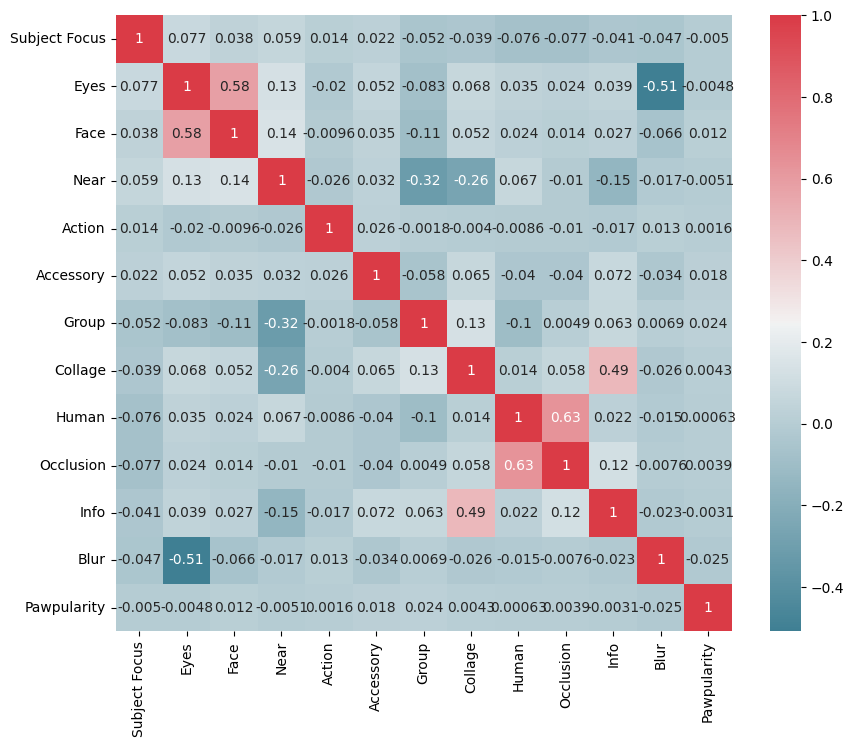

In [5]:
def correlationMatrix(data):
    f, ax = plt.subplots(figsize=(10, 8))
    corr = data.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
    plt.show()
no100data = train_data.drop(train_data[train_data["Pawpularity"]==100].index)
correlationMatrix(train_data)
correlationMatrix(no100data)

In [6]:

def linear_regression( X: pd.DataFrame, y: pd.DataFrame):
    lin_reg = LinearRegression()
    lin_reg.fit(X,y)
    return lin_reg

lin_reg = linear_regression(X_train,y_train)


In [7]:
columns =   ["Occlusion", "Near", "Subject Focus", "Group"]
logiX = train_data[columns]
logiy = train_data['Human'].values
logiX_train, logiX_test,logiy_train,logiy_test = train_test_split(logiX,logiy,test_size=0.2,random_state=random)

def logistic_regression_contains_human(X: pd.DataFrame, y:pd.DataFrame):
    log_reg = LogisticRegression()
    log_reg.fit(X,y)
    return log_reg


logi_reg = logistic_regression_contains_human(logiX_train,logiy_train)


# Uge 10 kapitel 8

## ROC Curve
*For binary classifier*

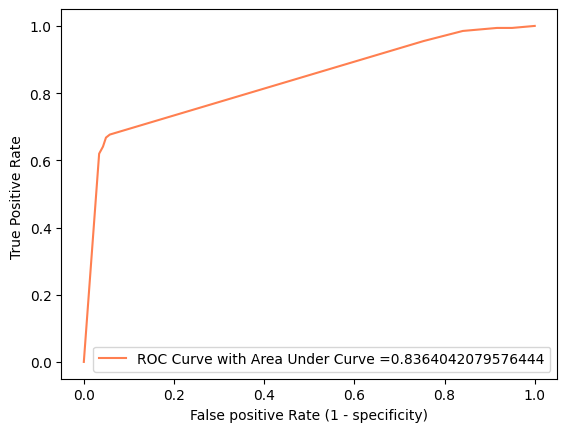

In [11]:
def get_roccurve(model, X_test_data: npt.ArrayLike, y_test_data: npt.ArrayLike, reg_type_name: str = ""):
    y_pred_proba = model.predict_proba(X=X_test_data)[:,1]
    [fpr, tpr, thr] = roc_curve(y_test_data, y_pred_proba)
    auc (fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve ='+str(auc (fpr, tpr)))
    plt.xlabel('False positive Rate (1 - specificity)')
    plt.ylabel('True Positive Rate ')
    plt.legend(loc='lower right')
    plt.savefig("./static/roccurve_" + reg_type_name + ".png")

get_roccurve(logi_reg, logiX_test, logiy_test, "logisticregression")

## Confusion matrix
*For classifiers*

In [13]:
def get_confusionmatrix(model, X_test_data: npt.ArrayLike, y_test_data: npt.ArrayLike):
    logiy_pred = model.predict(X_test_data)
    conf_matrix = sklearn.metrics.confusion_matrix(y_test_data, logiy_pred)
    return conf_matrix

get_confusionmatrix(logi_reg, logiX_test, logiy_test)

[[1579   70]
 [ 120  214]]


## Performance metrics
*For classifiers*

In [25]:
def get_performancemetrics(model, X_test_data: npt.ArrayLike, y_test_data: npt.ArrayLike, model_type_name: str = ""):
    y_pred = model.predict(X_test_data)
    p = sklearn.metrics.precision_score(logiy_test, y_pred, average='micro')
    r = sklearn.metrics.recall_score(logiy_test, y_pred, average='micro')
    f = sklearn.metrics.f1_score(logiy_test, y_pred, average='micro')
    a = sklearn.metrics.accuracy_score(logiy_test,y_pred)
    print ("Here're the metrics for the trained model(" + model_type_name + "):")
    print ("Precision:\t{}\nRecall:\t\t{}\nF-Score:\t{}\nAccuracy:\t{}".format(p,r,f,a))

get_performancemetrics(logi_reg, logiX_test, logiy_test, "logisticregression")

Here're the metrics for the trained model(logisticregression):
Precision:	0.9041855774079677
Recall:		0.9041855774079677
F-Score:	0.9041855774079677
Accuracy:	0.9041855774079677


## Cross validation for linear regression

In [30]:
def do_crossvalidation():
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)

    score_history = []
    for train, test in kf.split(X.to_numpy(), y):
        reg = LinearRegression()
        reg.fit(X.values[train,:], y.iloc[train])
        y_pred = reg.predict(X.values[test,:])
        score_history.append(reg.score(X.values[test,:], y.iloc[test]))
    return score_history
do_crossvalidation()

[-0.0011381531784111498,
 -0.0032655098200438104,
 0.0031372020899773645,
 -0.0007086870944514878,
 -0.0024666721129855684]

## TTK

In [8]:
window = tk.Tk()
window.title("Image application")
window.geometry("600x400")

frame  = ttk.Frame(window)
frame.pack()

sub_value = IntVar()
subcheck = tk.Checkbutton(frame, text="Sub", variable=sub_value)
subcheck.pack()

eye_value = IntVar()
eyecheck = tk.Checkbutton(frame, text="eye", onvalue=1 , offvalue=0, variable=eye_value)
eyecheck.pack()

face_value = IntVar()
facecheck = tk.Checkbutton(frame, text="face", onvalue=1 , offvalue=0, variable=face_value)
facecheck.pack()

near_value = IntVar()
nearcheck = tk.Checkbutton(frame, text="near", onvalue=1 , offvalue=0, variable=near_value)
nearcheck.pack()

act_value = IntVar()
actcheck = tk.Checkbutton(frame, text="act", onvalue=1 , offvalue=0, variable=act_value)
actcheck.pack()

acc_value = IntVar()
acccheck = tk.Checkbutton(frame, text="acc", onvalue=1 , offvalue=0, variable=acc_value)
acccheck.pack()

gru_value = IntVar()
grucheck = tk.Checkbutton(frame, text="gru", onvalue=1 , offvalue=0, variable=gru_value)
grucheck.pack()

col_value = IntVar()
colcheck = tk.Checkbutton(frame, text="col", onvalue=1 , offvalue=0, variable=col_value)
colcheck.pack()

hum_value = IntVar()
humcheck = tk.Checkbutton(frame, text="hum", onvalue=1 , offvalue=0, variable=hum_value)
humcheck.pack()

occ_value = IntVar()
occcheck = tk.Checkbutton(frame, text="occ", onvalue=1 , offvalue=0, variable=occ_value)
occcheck.pack()

inf_value = IntVar()
infcheck = tk.Checkbutton(frame, text="inf", onvalue=1 , offvalue=0, variable=inf_value)
infcheck.pack()

blu_value = IntVar()
blucheck = tk.Checkbutton(frame, text="blu", onvalue=1 , offvalue=0, variable=blu_value)
blucheck.pack()

image_label = Label()
score_Text = Label()

def searchImage():
    getvalue = train_data.loc[(train_data["Subject Focus"] == sub_value.get()) & (train_data["Eyes"] == eye_value.get()) & (train_data["Face"] == face_value.get()) & (train_data["Near"] == near_value.get()) & (train_data["Action"] == act_value.get()) & (train_data["Accessory"] == acc_value.get()) & (train_data["Group"] == gru_value.get()) & (train_data["Collage"] == col_value.get()) & (train_data["Human"] == hum_value.get()) & (train_data["Occlusion"] == occ_value.get()) & (train_data["Info"] == inf_value.get()) & (train_data["Blur"] == blu_value.get())]
    if len(getvalue) > 0:
        if logi_reg.predict(getvalue[columns])[0] == 0:
            score_Text.config(text="predicted score = " + str(lin_reg.predict(getvalue.drop(columns=["Pawpularity"]))[0]) + ". Actual score = "+ str(getvalue["Pawpularity"][0]))
            link = f"Data\\train\\{str(getvalue.index[0])}.jpg"
            my_img = ImageTk.PhotoImage(Image.open(link))
            image_label.configure(image=my_img)
            image_label.image = my_img


myButton = Button(frame, text='Åben billede', command=searchImage)

myButton.pack()
score_Text.pack()
image_label.pack()

window.mainloop()

KeyboardInterrupt: 

: 

## Uge 11 kapitel 9

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [10]:
GNB = GaussianNB()
MNB = MultinomialNB()
bayesX = train_data.drop(columns=['Occlusion', 'Pawpularity'])
bayesy = train_data['Occlusion']
bayesX_train, bayesX_test,bayesy_train,bayesy_test = train_test_split(bayesX,bayesy,test_size=0.2,random_state=random)
GNB.fit(bayesX_train, bayesy_train)
MNB.fit(bayesX_train, bayesy_train)

Gbayesy_pred = GNB.predict(bayesX_test)
Gcm = confusion_matrix(bayesy_test, Gbayesy_pred)
print(Gcm)

Mbayesy_pred = MNB.predict(bayesX_test)
Mcm = confusion_matrix(bayesy_test, Mbayesy_pred)
print(Mcm)


[[  78 1584]
 [   3  318]]
[[1564   98]
 [ 111  210]]


## Uge 12 kapitel 10

### Bagging

In [28]:
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import graphviz
from sklearn.tree import export_graphviz
import pydotplus

In [38]:
RandomforrestX_train, RandomforrestX_test,Randomforresty_train,Randomforresty_test = train_test_split(bayesX,bayesy,test_size=0.2,random_state=random)

RFModel = RandomForestClassifier(n_estimators=10, max_samples=0.7)
RFModel.fit(RandomforrestX_train,Randomforresty_train)

RFpred = RFModel.predict(RandomforrestX_test)
confusion_matrix(RFpred,Randomforresty_test)


array([[1556,   95],
       [ 106,  226]], dtype=int64)

### Boosting

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [37]:
base = DecisionTreeClassifier(criterion='gini', max_depth=1)
model_ada = AdaBoostClassifier(estimator = base, n_estimators=10)
model_ada.fit(bayesX_train, bayesy_train)
model_ada.feature_importances_

c:\Users\Ander\source\repos\PetfinderPawpularityScore\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([0.1, 0. , 0. , 0.2, 0. , 0.1, 0.2, 0.1, 0.2, 0.1, 0. ])

### Stacking

In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

In [51]:
SkackingModels =[('Logistic Regression',LogisticRegression()),("Mulit Bayes",MultinomialNB()), ('Naive Bayes',GaussianNB())]

stacking_model = StackingClassifier(estimators=SkackingModels,  final_estimator=LogisticRegression(), cv=3)

stacking_model.fit(bayesX_train, bayesy_train)

stacky_pred = stacking_model.predict(bayesX_test)
accuracy_score(bayesy_test, stacky_pred)

0.8976298537569339

## Uge 15 kapitel 11

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import matplotlib.pyplot as plt

import cv2
from sklearn.preprocessing import MinMaxScaler


In [13]:
kmean_columns = ['Pawpularity']
kmean_data = train_data.drop(columns=kmean_columns)
# kmean_train, kmean_test = train_test_split(train_data, test_size=0.75, random_state=random)
scaler = MinMaxScaler()
kmean_data_scaled = pd.DataFrame(scaler.fit_transform(kmean_data))
# kmean_test_scaled = pd.DataFrame(scaler.fit_transform(kmean_test))

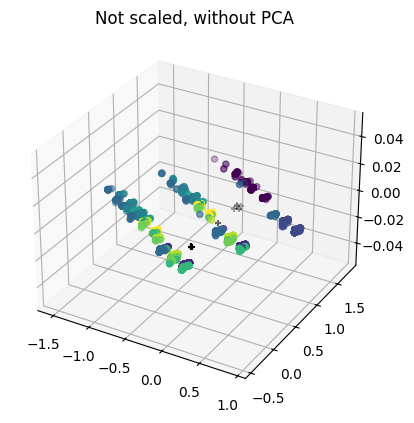

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

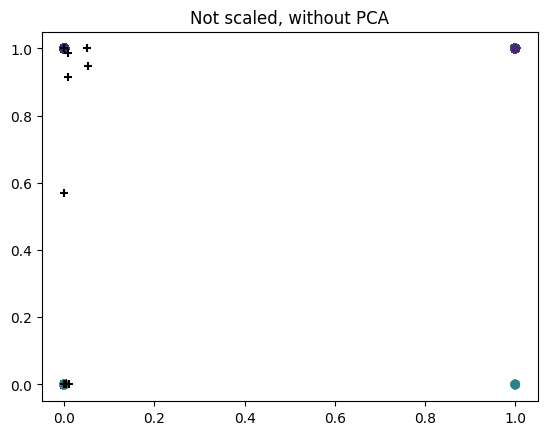

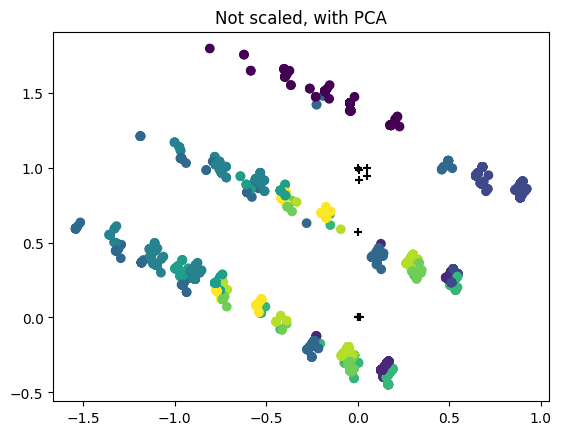

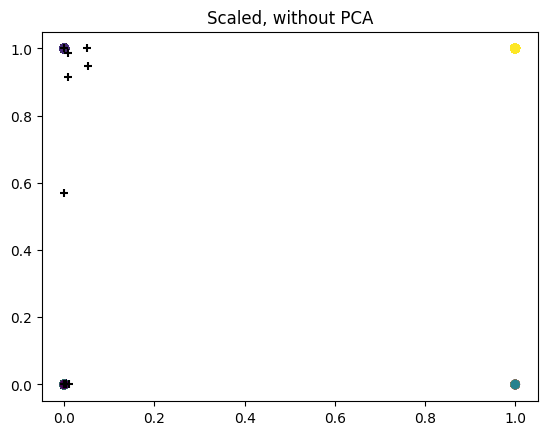

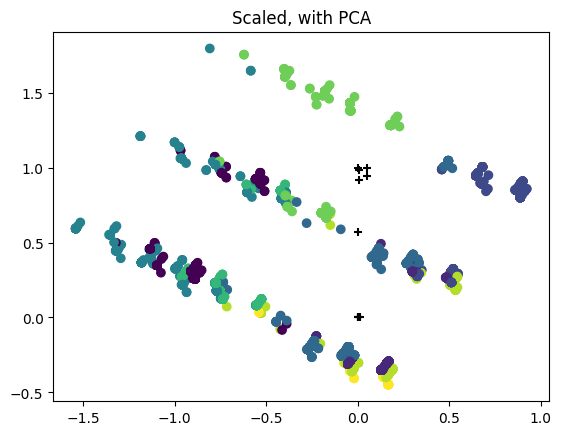

In [27]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(kmean_data)
kmean_pred = kmeans.predict(kmean_data)

kmeans_with_scaled = KMeans(n_clusters=6)
kmeans_with_scaled.fit(kmean_data_scaled)
kmean_pred_from_scaled = kmeans_with_scaled.predict(kmean_data_scaled)

pca = PCA(n_components=2)

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()

ax1.scatter(kmean_data.to_numpy()[:,0], kmean_data.to_numpy()[:,1], c=kmean_pred)
ax1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')
ax1.set_title("Not scaled, without PCA")
fig1.savefig("./static/kmeansplot_noscale_nopca.png")

X_pca = pca.fit_transform(kmean_data)
ax2.scatter(X_pca[:,0], X_pca[:,1], c=kmean_pred)
ax2.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')
ax2.set_title("Not scaled, with PCA")
fig2.savefig("./static/kmeansplot2_noscale_pca.png")

ax3.scatter(kmean_data_scaled.to_numpy()[:,0], kmean_data_scaled.to_numpy()[:,1], c=kmean_pred_from_scaled)
ax3.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')
ax3.set_title("Scaled, without PCA")
fig3.savefig("./static/kmeansplot3_scale_nopca.png")

X_pca = pca.fit_transform(kmean_data_scaled)
ax4.scatter(X_pca[:,0], X_pca[:,1], c=kmean_pred_from_scaled)
ax4.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')
ax4.set_title("Scaled, with PCA")
fig4.savefig("./static/kmeansplot4_scale_pca.png")



Visualize + knee point

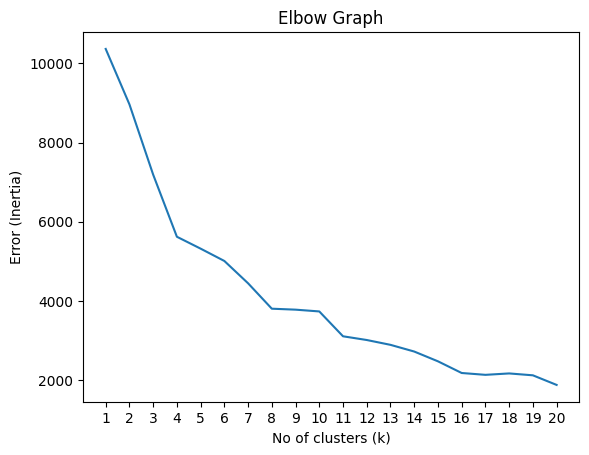

In [42]:
error = []
for i in range(1,21):
 kmeans = KMeans(n_clusters=i).fit(kmean_data_scaled)
 error.append(kmeans.inertia_)

plt.plot(range(1,21), error)
plt.title("Elbow Graph")
plt.xlabel("No of clusters (k)")
plt.ylabel("Error (Inertia)")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.savefig("static/kmeans_elbowgraph.png")

In [26]:
# data_path = r'Data\train.csv'
# temp_data = pd.read_csv(data_path, index_col=False)

# train_data = pd.DataFrame(temp_data)

scaler = MinMaxScaler()

X = temp_data.drop(columns=['Id'])

scaler.fit(X[['Pawpularity']])


X['Pawpularity'] = scaler.transform(X[['Pawpularity']])

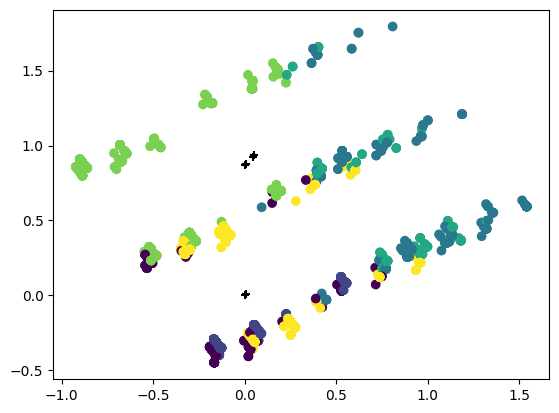

In [11]:
kmeans = KMeans(n_clusters=6)

kmeans.fit(X)

y = kmeans.predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')

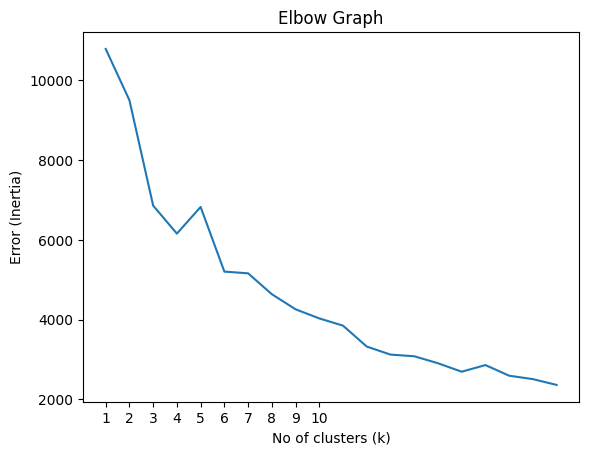

In [12]:
error = []
for i in range(1,21):
 kmeans = KMeans(n_clusters=i).fit(X)
 error.append(kmeans.inertia_)
import matplotlib.pyplot as plt

plt.plot(range(1,21), error)
plt.title("Elbow Graph")
plt.xlabel("No of clusters (k)")
plt.ylabel("Error (Inertia)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

### Clustering for images

<Figure size 1000x1000 with 0 Axes>

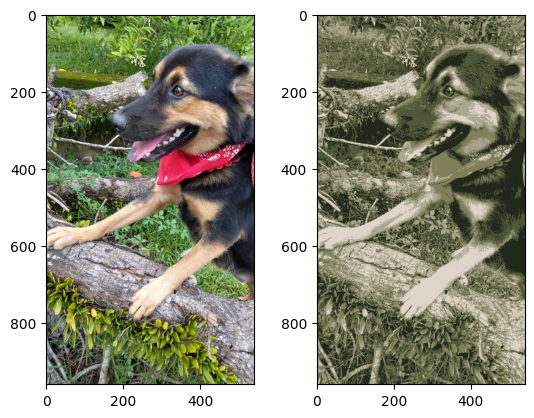

<Figure size 1000x1000 with 0 Axes>

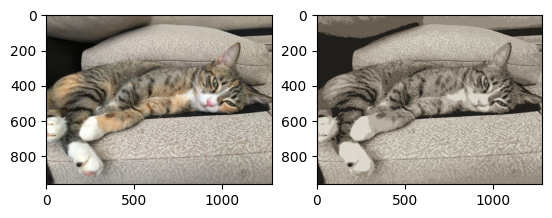

In [61]:
def image_kmeans(path: str, clusters: int = 5):
    source_image = cv2.imread(path)
    image = cv2.cvtColor(source_image, cv2.COLOR_RGB2BGR)
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    K=clusters
    _, labels, (centers) = cv2.kmeans(pixel_values, K, None, criteria, 10,
    cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    labels = labels.flatten()

    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    plt.figure(figsize=(10,10))
    fig, axs = plt.subplots(1,2)

    axs[0].imshow(image)
    axs[1].imshow(segmented_image)
    plt.show()

image_kmeans(r"Data\train\0a51fa22c7b84249889d1e157c54c11f.jpg")
image_kmeans(r"Data\train\0adbd3eeacf2e8318dc0313a5738543f.jpg")

## Uge 16+17 kapitel 12+13

In [1]:
#Husk også at importere dataen oppe fra Uge 10\n
    
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

In [5]:
# Load alt relevatn data fra opgave uge 10 kap 7\n
columns = ["Occlusion", "Near", "Subject Focus", "Group"]
logiX = train_data[columns]
logiy = train_data['Human'].values
logiX_train, logiX_test, logiy_train, logiy_test = train_test_split(logiX, logiy, test_size=0.2, random_state=42)

In [6]:
# Laver Dataframen om til numpy arrays og specificerer dem som datatypen "np.float32"
logiX_train = np.array(logiX_train, dtype=np.float32)
logiX_test = np.array(logiX_test, dtype=np.float32)
logiy_train = np.array(logiy_train, dtype=np.float32)
logiy_test = np.array(logiy_test, dtype=np.float32)

In [7]:
# Laver de konverterede numpy arrays om til Pytorch Tensors via torch.tensor
X_train_tensor = torch.tensor(logiX_train)
y_train_tensor = torch.tensor(logiy_train)
X_test_tensor = torch.tensor(logiX_test)
y_test_tensor = torch.tensor(logiy_test)

In [8]:
# Definerer det neutrale netværks model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(X_train_tensor.shape[1], 32)
        self.hidden2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.sigmoid(self.output(x))
        return x

In [9]:
# Træner det neutrale netværk
def train_model(model, X_train, y_train, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred.squeeze(), y_train)
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')
    return model

model = NeuralNetwork()
criterion = nn.MSELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Stochastic Gradient Descent

trained_model = train_model(model, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch 1/50, Loss: 0.2379
Epoch 2/50, Loss: 0.2378
Epoch 3/50, Loss: 0.2378
Epoch 4/50, Loss: 0.2377
Epoch 5/50, Loss: 0.2376
Epoch 6/50, Loss: 0.2376
Epoch 7/50, Loss: 0.2375
Epoch 8/50, Loss: 0.2374
Epoch 9/50, Loss: 0.2374
Epoch 10/50, Loss: 0.2373
Epoch 11/50, Loss: 0.2372
Epoch 12/50, Loss: 0.2372
Epoch 13/50, Loss: 0.2371
Epoch 14/50, Loss: 0.2370
Epoch 15/50, Loss: 0.2369
Epoch 16/50, Loss: 0.2369
Epoch 17/50, Loss: 0.2368
Epoch 18/50, Loss: 0.2367
Epoch 19/50, Loss: 0.2367
Epoch 20/50, Loss: 0.2366
Epoch 21/50, Loss: 0.2365
Epoch 22/50, Loss: 0.2365
Epoch 23/50, Loss: 0.2364
Epoch 24/50, Loss: 0.2363
Epoch 25/50, Loss: 0.2363
Epoch 26/50, Loss: 0.2362
Epoch 27/50, Loss: 0.2361
Epoch 28/50, Loss: 0.2361
Epoch 29/50, Loss: 0.2360
Epoch 30/50, Loss: 0.2359
Epoch 31/50, Loss: 0.2359
Epoch 32/50, Loss: 0.2358
Epoch 33/50, Loss: 0.2357
Epoch 34/50, Loss: 0.2356
Epoch 35/50, Loss: 0.2356
Epoch 36/50, Loss: 0.2355
Epoch 37/50, Loss: 0.2354
Epoch 38/50, Loss: 0.2354
Epoch 39/50, Loss: 0.

In [10]:
# Evaluer modellen
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        predicted = (y_pred > 0.5).float()
        accuracy = (predicted == y_test).float().mean().item()
        print(f'Test Accuracy: {accuracy:.2f}')
    return accuracy

test_accuracy = evaluate_model(trained_model, X_test_tensor, y_test_tensor)

Test Accuracy: 0.79


## Uge 18 kapitel 14

In [13]:
from torch import nn
import torch as torch
from PIL import Image
import torchvision.transforms.functional as TF
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import confusion_matrix
from torchvision import transforms
from PIL import Image
import os
from tkinter import messagebox






Data prep

In [14]:

# Define the dataset class
class ImageDatasetFromCSV(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        self.labels_df = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.labels_df.iloc[idx, 0])
        image = Image.open(img_name)
        label = self.labels_df.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        
        return image, label

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale if needed
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Paths
csv_file = r"Data/cat_or_dog_train.csv"  # Replace with your CSV file path
image_dir = r"Data/cat_or_dog_train"  # Replace with your image directory

# Load images using the custom dataset
full_dataset = ImageDatasetFromCSV(csv_file, image_dir, transform=transform)

# Define the train-test split ratio
train_ratio = 0.8
test_ratio = 0.2
total_size = len(full_dataset)
train_size = int(total_size * train_ratio)
test_size = total_size - train_size

# Split the dataset into training and testing sets
train_dog_or_cat, test_dog_or_cat = random_split(full_dataset, [train_size, test_size])

# Create DataLoader for train and test datasets
batch_size = 32
train_loader_dog_or_cat = DataLoader(train_dog_or_cat, batch_size=batch_size, shuffle=True)
test_loader_dog_or_cat = DataLoader(test_dog_or_cat, batch_size=batch_size, shuffle=False)



Billedegenkendelse

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dog


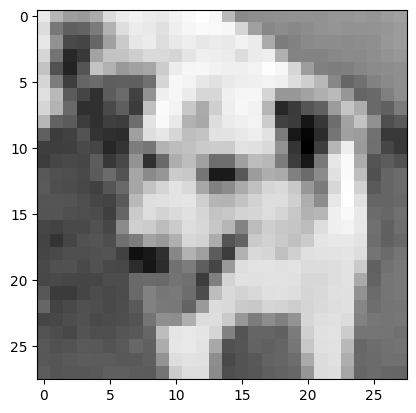

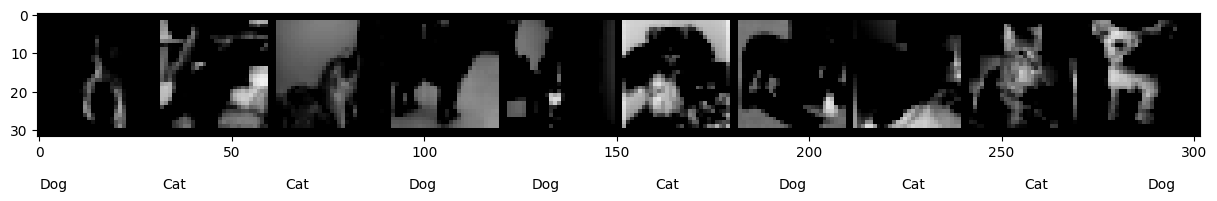

In [15]:
all_transforms = transforms.Compose([
    transforms.ToTensor()
])
convolutional_train_data = train_dog_or_cat#torchvision.datasets.FashionMNIST ('fashion_data', train=True, download=True, transform=all_transforms)
convolutional_test_data = test_dog_or_cat#torchvision.datasets.FashionMNIST ('fashion_data', train=False, transform=all_transforms)

convolutional_train_loader = train_loader_dog_or_cat
convolutional_test_loader = test_loader_dog_or_cat

samples, labels = next(iter(convolutional_train_loader))
samples.size()

def dog_or_cat_label(label):
    output_mapping = {
        0: "Cat",
        1: "Dog",
    }
    label = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[label]

idx = 2
plt.imshow(samples[idx].squeeze(), cmap="gray")
print(dog_or_cat_label(labels[idx].item()))

sample_loader = torch.utils.data.DataLoader(convolutional_train_data, batch_size=10)

batch = next(iter(sample_loader))
images, labels = batch

grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))

for i, label in enumerate(labels):
    plt.text(32*i, 45, dog_or_cat_label(label))



Convolutional neural network model

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.convlayer = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4)
        )
        self.fully_connected_layer_1 = nn.Linear(in_features=32*7*7, out_features=64)
        self.drop = nn.Dropout(0.25)
        self.fully_connected_layer_2 = nn.Linear(in_features=64, out_features=64)
        self.fully_connected_layer_3 = nn.Linear(in_features=64, out_features=10)
    
    def forward(self, x):
        out = self.convlayer(x)
        out = out.view(out.size(0), -1)
        out = self.fully_connected_layer_1(out)
        out = self.drop(out)
        out = self.fully_connected_layer_2(out)
        out = self.fully_connected_layer_3(out)
        return out

model = CNN()

error = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
lstlosses = []
lstiterations = []
lstaccuracy = []

predictions_list = []
labels_list = []

num_epochs = 3 # Indicate maximum epochs for training
num_batches = 0 # Keep a track of batches of training data
batch_size = 10 # Configurable for tracking accuracy

for epoch in range(num_epochs):
    print("Epoch: {} of {}".format(epoch + 1, num_epochs))  # Print the epoch number
    for images, labels in convolutional_train_loader:
        train = Variable(images)
        labels = Variable(labels)

        outputs = model(train)
        loss = error(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        num_batches += 1

        if num_batches % batch_size == 0:
            total = 0
            matches = 0
            
            for images, labels in convolutional_test_loader:
                labels_list.append(labels)
                test = Variable(images)
                outputs = model(test)

                predictions = torch.max(outputs, 1)[1]
                predictions_list.append(predictions)
                matches += (predictions == labels).sum()
                total += len(labels)

            accuracy = matches * 100 / total
            lstlosses.append(loss.data)
            lstiterations.append(num_batches)
            lstaccuracy.append(accuracy)

        if not (num_batches % batch_size):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(num_batches, loss.data, accuracy))


print("Training completed.")



Epoch: 1 of 3
Iteration: 10, Loss: 0.8793482184410095, Accuracy: 51.625%
Iteration: 20, Loss: 0.7855777740478516, Accuracy: 51.1875%
Iteration: 30, Loss: 0.7087821960449219, Accuracy: 53.3125%
Iteration: 40, Loss: 0.7145406007766724, Accuracy: 51.375%
Iteration: 50, Loss: 0.6355109214782715, Accuracy: 53.8125%
Iteration: 60, Loss: 0.6496531963348389, Accuracy: 49.375%
Iteration: 70, Loss: 0.6716486811637878, Accuracy: 53.75%
Iteration: 80, Loss: 0.6646418571472168, Accuracy: 61.625%
Iteration: 90, Loss: 0.6471630930900574, Accuracy: 61.5625%
Iteration: 100, Loss: 0.6979880928993225, Accuracy: 64.0625%
Iteration: 110, Loss: 0.6005143523216248, Accuracy: 63.875%
Iteration: 120, Loss: 0.6475799083709717, Accuracy: 63.3125%
Iteration: 130, Loss: 0.6284576654434204, Accuracy: 60.9375%
Iteration: 140, Loss: 0.724328875541687, Accuracy: 63.3125%
Iteration: 150, Loss: 0.6148524880409241, Accuracy: 67.0625%
Iteration: 160, Loss: 0.5654481649398804, Accuracy: 64.5625%
Iteration: 170, Loss: 0.738

Applikation

In [23]:
def load_image(image_path):
    image = Image.open(image_path)
    return transform(image).unsqueeze(0)  # Add batch dimension

def predict_image(model, image_tensor):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
    return predicted

def display_prediction(image_name, predicted_label):
    class_names = ['Cat', 'Dog']  # Example class names
    prediction_text = f"Predicted label: {predicted_label.item()} ({class_names[predicted_label]})"

    return prediction_text

def on_predict():
    image_name = entry.get()
    if not image_name:
        messagebox.showwarning("Input Error", "Please enter an image name.")
        return

    try:
        image_name_path = "Data/train/" + image_name + ".jpg"
        # Load and preprocess the image
        image_tensor = load_image(image_name_path)

        # Predict the label
        predicted_label = predict_image(model, image_tensor)

        # Display prediction and visualize the image
        prediction = display_prediction(image_name_path, predicted_label)

        # Update the result label
        result_label.config(text=prediction)
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# Create the main window
window = tk.Tk()
window.title("Image Prediction Application")
window.geometry("600x400")

# Create a label and entry for image name input
tk.Label(window, text="Enter image name:").pack(pady=10)
entry = tk.Entry(window, width=50)
entry.pack(pady=10)

# Create a button to trigger the prediction
predict_button = tk.Button(window, text="Predict", command=on_predict)
predict_button.pack(pady=10)

# Create a label to display the prediction result
result_label = tk.Label(window, text="", fg="blue")
result_label.pack(pady=20)

# Run the Tkinter event loop
window.mainloop()